In [1]:
%pylab inline

import pandas as pd
df = pd.read_excel('data.xlsx')

df = df.drop(['DCDate'], axis=1)
df = df.replace(' ', np.NaN)

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = df.values.copy()
data[df.values == df.values[0, -2]] = np.NaN

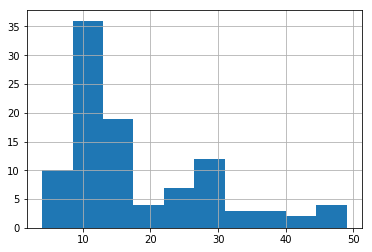

In [4]:
aa = df.isnull()
aa.sum(axis=1).hist()

In [5]:
# remove subjects with more than 30 missing values
df = df[df.isnull().sum(axis=1) < 30]

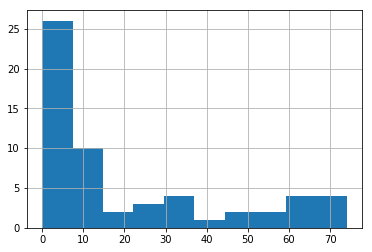

In [6]:
df.isnull().sum(axis=0).hist()

In [7]:
df.loc[:, df.isnull().sum(axis=0) < 10];

In [8]:
df.loc[:, df.isnull().sum(axis=0) < 10];

# data for clustering, removes some 
df_clustering = df.drop(['Classification ', 'PIDN', 'AgeAtDC', 'Gender', 'Educ', 'Hand'], axis=1)

df_clustering = df_clustering.fillna(df.mean())
X = df_clustering.values.astype(np.float)

# Start of clustering code

In [9]:
df_clustering = df_clustering.fillna(df.mean())
X = df_clustering.values.astype(np.float)

In [10]:
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [11]:
X = StandardScaler().fit_transform(X)
X_dimred = PCA(n_components=10).fit_transform(X)
n_components = 2
clf = BayesianGaussianMixture(
        weight_concentration_prior_type="dirichlet_distribution",
        n_components=2 * n_components, init_params='random',
        max_iter=15000, mean_precision_prior=.8, reg_covar=1e-12, weight_concentration_prior=1e-6)
clf.fit(X_dimred)
np.unique(clf.predict(X_dimred)).size


4

In [12]:
clf = KMeans(n_clusters=2).fit(X)
X_2 = PCA(n_components=2).fit_transform(X)
#X_2 = TSNE().fit_transform(X)

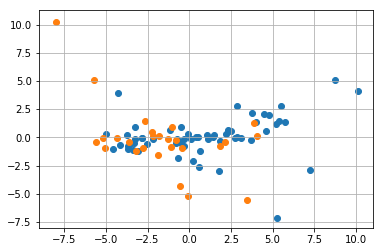

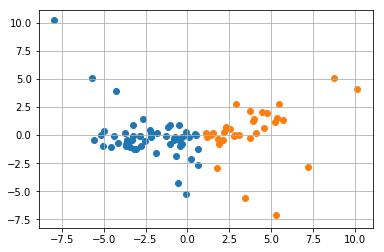

In [13]:
idx1 = (df['Classification '] == 'L').values
plt.scatter(X_2[idx1, 0], X_2[idx1, 1], label='L')
plt.scatter(X_2[~idx1, 0], X_2[~idx1, 1], label='L')
plt.grid()
plt.show()

idxc = (clf.predict(X) == 0)
plt.scatter(X_2[idxc, 0], X_2[idxc, 1], label='L')
plt.scatter(X_2[~idxc, 0], X_2[~idxc, 1], label='L')
plt.grid()

In [14]:
(idx1 == idxc).mean()

0.43529411764705883